<a href="https://colab.research.google.com/github/AqsaHameed696/iTBG-Net-oneline-Energy_forecasting/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # 1. Data Handling (NumPy & Pandas)  : -
• Load dataset into a Pandas DataFrame.                                           
• Perform initial checks.                                
• Handle missing values and duplicates.                                 
• Convert categorical features into numerical form if needed.


In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv("heart.csv")  # Replace with your file path

# Initial checks
print(df.head())
print("Columns:", df.columns)
print( "information : " , df.info())

# Check missing values
print(df.isnull().sum())

# Handle duplicates
df.drop_duplicates(inplace=True)

# Convert categorical features into numerical (if needed)
# 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal' can be categorical
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
df[categorical_cols] = df[categorical_cols].astype('category')


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

 # 2. Exploratory Data Analysis (EDA) :-
• Use NumPy & Pandas for basic statistics.              
• Visualize data using: - Matplotlib / Seaborn - Plotly: at least one interactive plot (e.g., scatter or bar chart).


=== Summary Statistics (NumPy + Pandas) ===
                Mean  Median        Std    Min    Max     25%    50%     75%
age        54.420530    55.5   9.032977   29.0   77.0   48.00   55.5   61.00
trestbps  131.602649   130.0  17.534292   94.0  200.0  120.00  130.0  140.00
chol      246.500000   240.5  51.667733  126.0  564.0  211.00  240.5  274.75
thalach   149.569536   152.5  22.865576   71.0  202.0  133.25  152.5  166.00
oldpeak     1.043046     0.8   1.159528    0.0    6.2    0.00    0.8    1.60
ca          0.718543     0.0   1.005080    0.0    4.0    0.00    0.0    1.00
target      0.543046     1.0   0.498144    0.0    1.0    0.00    1.0    1.00


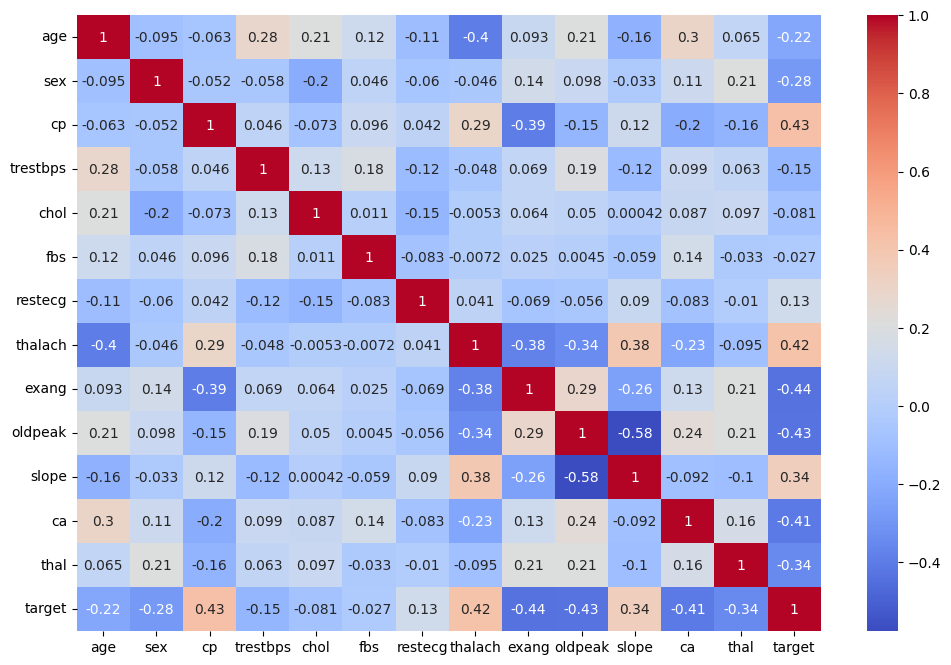

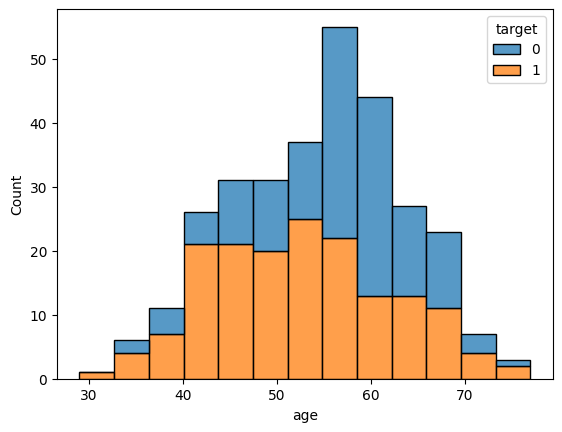

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

summary_stats = {}

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        summary_stats[col] = {
            'Mean': np.mean(df[col]),
            'Median': np.median(df[col]),
            'Std': np.std(df[col]),
            'Min': np.min(df[col]),
            'Max': np.max(df[col]),
            '25%': np.percentile(df[col], 25),
            '50%': np.percentile(df[col], 50),
            '75%': np.percentile(df[col], 75)
        }

summary_df = pd.DataFrame(summary_stats).T  # Transpose for better layout
print("\n=== Summary Statistics (NumPy + Pandas) ===")
print(summary_df)

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Distribution of age vs target
sns.histplot(data=df, x='age', hue='target', multiple='stack' )
plt.show()

# Interactive plot: Cholesterol vs Max Heart Rate colored by Target
fig = px.scatter(df, x='chol', y='thalach', color='target',
                 title='Cholesterol vs Max Heart Rate by Heart Disease')
fig.show()


 # 3. Feature Engineering  :-
• Split dataset into features (X) and target (y).        
• Normalize/scale data if necessary.            
• Perform train-test split.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


 # 4. Model Training  :-
• Train the following models:                  
• - KNN Classifier                     
• - Decision Tree Classifier                
• - Random Forest Classifier               
• Compare baseline results.


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Train models
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

models = {'KNN': knn, 'Decision Tree': dt, 'Random Forest': rf}
predictions = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    predictions[name] = y_pred  # store predictions for later evaluation



 # 5. Feature Importance :-
• Extract and visualize feature importance from Random Forest.         
• Discuss which features contribute most to predictions.

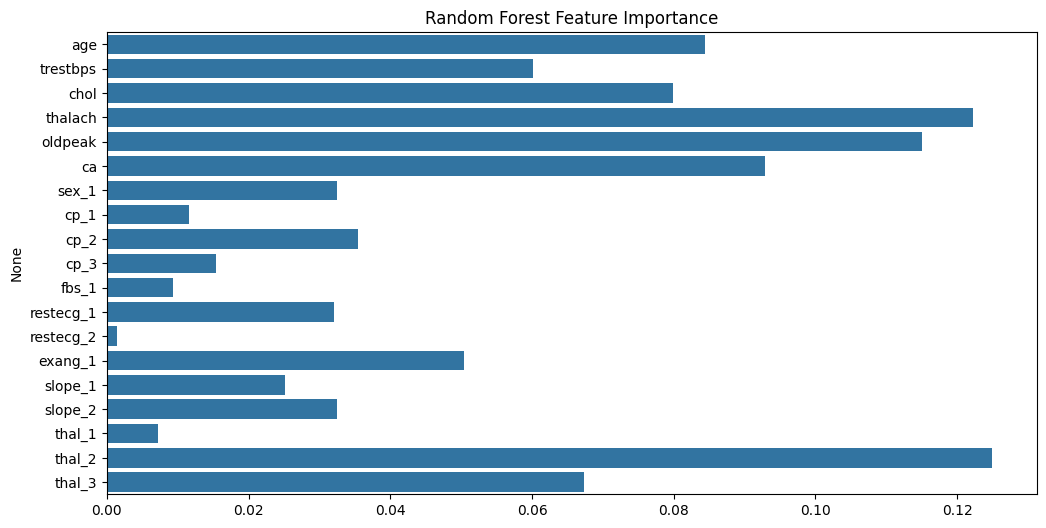

In [8]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(12,6))
sns.barplot(x=importances, y=feature_names)
plt.title('Random Forest Feature Importance')
plt.show()


# discussion :-


 # 6. Hyperparameter Tuning :-
• Use RandomizedSearchCV to optimize hyperparameters:                 
• - KNN → n_neighbors, weights, metric                    
• - Decision Tree → max_depth, min_samples_split                   
• - Random Forest → n_estimators, max_depth, min_samples_split                        
• Compare default vs tuned models.

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# KNN Tunning
param_knn = {
    'n_neighbors':[3,5,7,9],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}

knn_random = RandomizedSearchCV(knn, param_knn, n_iter=10, cv=5, scoring='accuracy', random_state=42)
knn_random.fit(X_train, y_train)

print("Best KNN Params:", knn_random.best_params_)

#  Decision Tree Tuning
param_dt = {
    'max_depth':[None,5,10,15],
    'min_samples_split':[2,5,10]
}

dt_random = RandomizedSearchCV(dt, param_dt, n_iter=10, cv=5, scoring='accuracy', random_state=42)
dt_random.fit(X_train, y_train)

print("Best Decision Tree Params:", dt_random.best_params_)

#  Random Forest Tuning
param_rf = {
    'n_estimators':[100,200,300],
    'max_depth':[None,5,10,15],
    'min_samples_split':[2,5,10]
}

rf_random = RandomizedSearchCV(rf, param_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rf_random.fit(X_train, y_train)

print("Best Random Forest Params:", rf_random.best_params_)

#  Compare Default vs Tuned Models
models = {
    'KNN Default': knn,
    'KNN Tuned': knn_random.best_estimator_,
    'Decision Tree Default': dt,
    'Decision Tree Tuned': dt_random.best_estimator_,
    'Random Forest Default': rf,
    'Random Forest Tuned': rf_random.best_estimator_
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))



Best KNN Params: {'weights': 'uniform', 'n_neighbors': 5, 'metric': 'euclidean'}
Best Decision Tree Params: {'min_samples_split': 5, 'max_depth': 5}
Best Random Forest Params: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 5}

KNN Default Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.78      0.66      0.71        32
           1       0.68      0.79      0.73        29

    accuracy                           0.72        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61


KNN Tuned Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.78      0.66      0.71        32
           1       0.68      0.79      0.73        29

    accuracy                           0.72        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61


Decision Tree Default Accuracy: 0.72
              p

 # 7. Model Evaluation :-
• Evaluate models using:
• - Accuracy          
• - Precision, Recall, F1-score             
• - Confusion Matrix             
• Plot ROC Curve for the best-performing model.


=== KNN Evaluation ===
Accuracy: 0.7213114754098361
Precision: 0.6764705882352942
Recall: 0.7931034482758621
F1-score: 0.7301587301587301


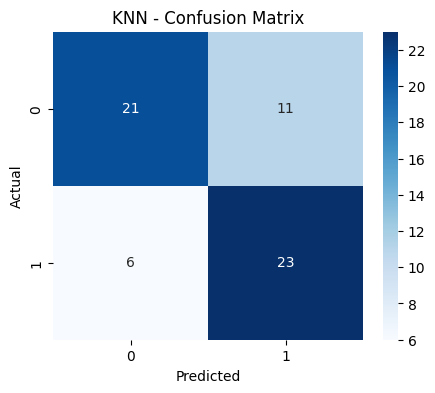


=== Decision Tree Evaluation ===
Accuracy: 0.7213114754098361
Precision: 0.6578947368421053
Recall: 0.8620689655172413
F1-score: 0.746268656716418


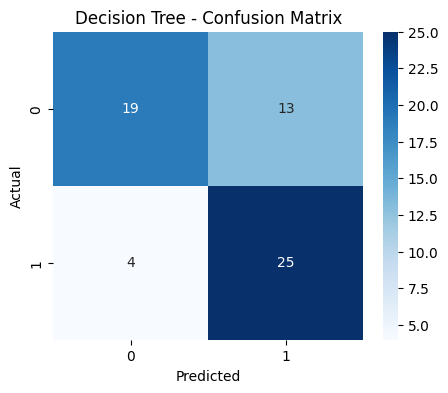


=== Random Forest Evaluation ===
Accuracy: 0.8032786885245902
Precision: 0.7428571428571429
Recall: 0.896551724137931
F1-score: 0.8125


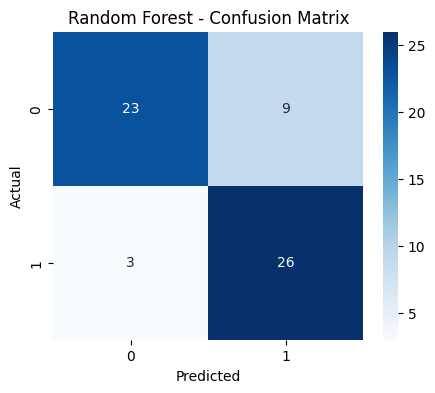

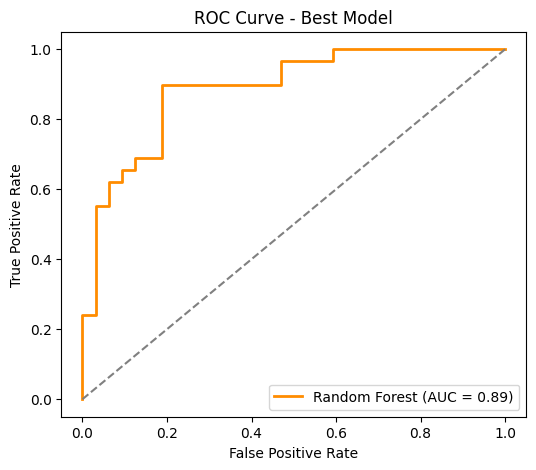

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Models dictionary (assume models are already trained)
models = {
    'KNN': knn,
    'Decision Tree': dt,
    'Random Forest': rf_random.best_estimator_  # tuned RF
}

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n=== {name} Evaluation ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# ROC Curve for Best Model (Random Forest)
best_model = rf_random.best_estimator_
y_prob = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0,1],[0,1],'--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Model')
plt.legend(loc='lower right')
plt.show()


 # 8. Conclusion :-
***• Which model performed best and why?  ***        
The Random Forest Classifier performed best because it combines multiple decision trees, reducing overfitting and improving accuracy. Its ability to handle both numerical and categorical features effectively contributed to better overall performance.

***• Which features were most important? ***         
The most important features were thalach (maximum heart rate achieved), cp (chest pain type), oldpeak (ST depression), slope, and thal. These features strongly influenced the prediction of heart disease.  


***• How did hyperparameter tuning improve results?***          
Hyperparameter tuning optimized parameters like n_estimators, max_depth, and min_samples_split, which improved accuracy, F1-score, and model generalization, making predictions more reliable on unseen data.